# Visualising maths in jupyter notebook

Below are the neccesary modules required for us to be able to perform mathematical caculations compuationally

In [2]:
#Enables inline plotting. (can't place comments on magic commands, which are jupyter specific commands that enable actions on specific code)
%matplotlib inline
import matplotlib.pyplot as plt # Loads the Matplotlib plotting interface.
from sympy import * #Imports all features of SymPy for symbolic math.
import scipy as sc # Imports SciPy for numerical and scientific computations.
import numpy as np
init_printing() # for pretty-printing equations etc

in order to create symbolic variables for the mathematical variables we want to work with we need to use SymPy, which can then be created using var: 

In [3]:
x = var('x') #define x as x (to be used in an equation)
type(x) #check its class

sympy.core.symbol.Symbol

define multiple symbolic variables at once

In [4]:
a, b, c =var("a, b ,c")

its often important to add assumptions (constraints) to our symbolic variables

In [5]:
x = var('x', real=True) #x defined as real number
x.is_imaginary 

False

other examples

In [6]:
x = Symbol('x', positive = True) #x defined as positive number
x > 0

In [7]:
x < 0

## Symbolic Equations

mathematical equations we will be using can be defined as follows

In [8]:
MyFun = (pi + x)**2; MyFun

see my function in latex text

In [9]:
latex(MyFun)

'\\left(x + \\pi\\right)^{2}'

There are extra slashes so python can parse it correctly,. To display it so it can be directly copy and pasted into Latex do below

In [10]:
print(latex(MyFun))

\left(x + \pi\right)^{2}


## Numerical evaluation

To evaluate an expression numerically we can use the evalf function (or N). It takes an argument n which specifies the number of significant digits.

In [11]:
pi.evalf(n=100) #pi.to a 100 places after decimal!

N() is short for evalf()

In [12]:
N(pi, 50)

### Lets test our function

In [13]:
N(MyFun, 5)

In [14]:
print(MyFun)
print(x)

(x + pi)**2
x


Numerically then evaluating the algebraic expression by substituting a numerical value using the subs function

In [15]:
MyFun.subs(x, 1.5)

It can also be used to substitute mathematical variables or expressions. Lets sub x with a + pi

In [16]:
MyFun.subs(x, a+pi)

assign it as a new symbolic equation (to be used later)

In [17]:
MyFun_new = MyFun.subs(x, a+pi); MyFun_new

Numerically evaluate the function over a range of values using NumPy arrays

In [18]:
x_vec = np.arange(0, 10, 0.1) #create an array, with 100 elements
MyFun_vec = np.array([N(MyFun.subs(x, xx)) for xx in x_vec]) #creates an array substituting the values from the array above into our equation

the same can be done for the array created above, with its value being reevaluated

In [19]:
MyFun_new_vec = np.array([N((MyFun_new).subs(a, xx)) for xx in x_vec])

#### Lets plot these

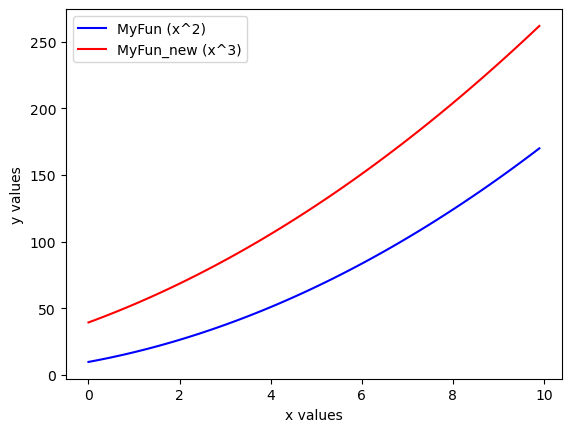

In [20]:
fig, ax = plt.subplots()#convenience function in Matplotlib that creates figure and axes
ax.plot(x_vec, MyFun_vec, label="MyFun (x^2)", color="blue") #line plot added to ax plotting x_vec on x axis et. 
ax.plot(x_vec, MyFun_new_vec, label="MyFun_new (x^3)", color="red")

# Label the axes
ax.set_xlabel("x values")  # Label for the x-axis
ax.set_ylabel("y values")  # Label for the y-axis

#create legend
ax.legend()

#### How to speed things up

lambdify converts a symbolic SymPy function into a fast, NumPy-compatible function for efficient numerical evaluation of arrays or large datasets. 

lambdify converts a symbolic SymPy function into a fast, NumPy-compatible Python function by taking the symbolic variables and expression, replacing SymPy operations with their NumPy equivalents, and enabling efficient numerical evaluation over arrays or large datasets.

In [21]:
MyFun_lamb = lambdify([x], MyFun, 'numpy') #specifies symbolic variables to be used (x), the function, and for NumPy functions to be used instead of SymPys

In [22]:
MyFun_vec = MyFun_lamb(x_vec)

this speedup is significant: below we don't use this technique

In [23]:
%%timeit #remember this?    

MyFun_vec = np.array([N(((x + pi)**2).subs(x, xx)) for xx in x_vec]) 

7.55 ms ± 297 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


here we do: even in this example it is many times faster

In [24]:
%%timeit

MyFun_vec = MyFun_lamb(x_vec)

1.58 µs ± 62.9 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


## Fundamental Mathematical Operations

Lets looks at some fundamental mathematical operations that you will likely use

In [25]:
expand(MyFun)

Expand takes a number of keyword arguments which we can tell functions what kind of expansions we want to perform

In [27]:
print(expand(MyFun)) #you can also print its raw python form

x**2 + 2*pi*x + pi**2


factor back in using; factor;

In [28]:
factor(x**2 + 2*pi*x + pi**2)

### Apart and together

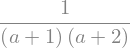

In [29]:
f1 = 1/((a+1)*(a+2)); f1

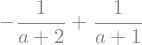

In [30]:
apart(f1)   #to seperate them

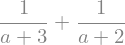

In [31]:
f2 = 1/(a+2) + 1/(a+3); f2

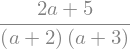

In [32]:
together(f2)

### Simplification

simplify(); will simplify the mexpression into a nice looking expression, by using various techniques. More specific alternatives to the simplify functions also exists. trigsimp, powsimp, logcombine. Applying simplify to the example above will give us the same result as together:

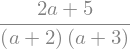

In [33]:
simplify(f2)

Note simplify usually combines expressions but does not factor

### Differentiation

It is usually simple. Use the Diff function. THe first argument is the expression to take the derative of. The second is the symbol by which to take the derivative. 

In [34]:
diff(MyFun_new, a)

for higher order differentiation we do: 

In [35]:
diff(MyFun_new, a, a) 

In [36]:
diff(MyFun_new**2, a, 2) # same as above